In [1]:
import numpy as np
import math

In [2]:
def tanh(x):
    return np.tanh(x)

def softmax(x):
    exp = np.exp(x-x.max())
    return exp/exp.sum()

In [3]:
dimensions = [28*28,10]
activations=[tanh,softmax]

In [4]:
distributions=[
    {'b':[0,0]},
    {'b':[0,0],'w':[-math.sqrt(6/(dimensions[0]+dimensions[1])),math.sqrt(6/(dimensions[0]+dimensions[1]))]},
]

In [5]:
def init_parameter_b(layer):
    dis = distributions[layer]['b']
    return np.random.rand(dimensions[layer])*(dis[1]-dis[0]) + dis[0]

def init_parameter_w(layer):
    dis = distributions[layer]['w']
    return np.random.rand(dimensions[layer-1],dimensions[layer])*(dis[1]-dis[0]) + dis[0]

def init_parameters():
    parameters=[]
    for i in range(len(distributions)):
        layer_parameter={}
        for j in distributions[i].keys():
            if j=='b':
                layer_parameter['b']=init_parameter_b(i)
                continue
            if j=='w':
                layer_parameter['w']=init_parameter_w(i)
                continue
        parameters.append(layer_parameter)
    return parameters

In [6]:
parameters = init_parameters()

In [7]:
def predict(img,parameters):
    l0_in = img + parameters[0]['b']
    l0_out = activations[0](l0_in)
    l1_in = np.dot(l0_out,parameters[1]['w']) + parameters[1]['b']
    l1_out = activations[1](l1_in)
    return l1_out

In [8]:
# predict(np.random.rand(784),parameters).argmax()

In [9]:
from pathlib import Path
import struct

In [10]:
datasets_path = Path("../datasets")
train_img_path = datasets_path/'train-images-idx3-ubyte'
train_lab_path = datasets_path/'train-labels-idx1-ubyte'
test_img_path = datasets_path/'t10k-images-idx3-ubyte'
test_lab_path = datasets_path/'t10k-labels-idx1-ubyte'

In [45]:
train_num = 50000
valid_num = 10000
test_num=10000



with open(train_img_path,'rb') as f:
    struct.unpack('>4i',f.read(16))
    temp_img = np.fromfile(f,dtype=np.uint8).reshape(-1,28*28)
    train_img = temp_img[:train_num]
    valid_img = temp_img[train_num:]

with open(test_img_path,'rb') as f:
    struct.unpack('>4i',f.read(16))
    test_img = np.fromfile(f,dtype=np.uint8).reshape(-1,28*28)
    
with open(train_lab_path,'rb') as f:
    struct.unpack('>2i',f.read(8))
    temp_lab = np.fromfile(f,dtype=np.uint8)
    train_lab = temp_lab[:train_num]
    valid_lab = temp_lab[train_num:]
    
with open(test_lab_path,'rb') as f:
    struct.unpack('>2i',f.read(8))
    test_lab = np.fromfile(f,dtype=np.uint8)

In [46]:
import matplotlib.pylab as plt

In [47]:
def show_train(index):
    plt.imshow(train_img[index].reshape(28,28),cmap='gray')
    print("Lable: {}".format(train_lab[index]))

def show_valid(index):
    plt.imshow(valid_img[index].reshape(28,28),cmap='gray')
    print("Lable: {}".format(valid_lab[index]))
    
def show_test(index):
    plt.imshow(test_img[index].reshape(28,28),cmap='gray')
    print("Lable: {}".format(test_lab[index]))

Lable: 6


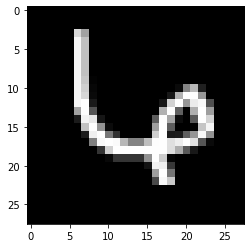

In [89]:
show_train(np.random.randint(train_num))

Lable: 0


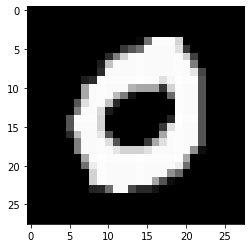

In [66]:
show_valid(np.random.randint(valid_num))

Lable: 7


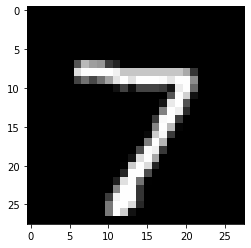

In [49]:
show_test(np.random.randint(test_num))